# Pré-Processamento De Dados

Neste arquivo será realizado o pré-processamento de dados, bem como filtros temperais, espaciais e visualizações de dados em gráficos

In [1]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
from scipy import signal
import mne
from copy import deepcopy as dc


# definições de filtros

def butter_bandpass(data, lowcut, highcut, fs=200, order=4):
    nyq = fs * 0.5
    low = lowcut / nyq
    high = highcut / nyq
    b, a = signal.butter(order, [low, high], btype='bandpass')
    return signal.filtfilt(b, a, data)


def butter_lowpass(data, lowcut, fs=200, order=4):
    nyq = fs * 0.5
    low = lowcut / nyq
    b, a = signal.butter(order, low, btype='lowpass')
    return signal.filtfilt(b, a, data)


def butter_highpass(data, highcut, fs=200, order=4):
    nyq = fs * 0.5
    high = highcut / nyq
    b, a = signal.butter(order, high, btype='highpass')
    return signal.filtfilt(b, a, data)


def butter_notch(data, cutoff, var=1, fs=200, order=4):
    nyq = fs * 0.5
    low = (cutoff - var) / nyq
    high = (cutoff + var) / nyq
    b, a = signal.iirfilter(order, [low, high], btype='bandstop', ftype="butter")
    return signal.filtfilt(b, a, data)

# Visualização de gráficos com e sem filtros

Explicação...

In [2]:
def print_graphs(data):
    for i in range(data.shape[1]):
        plt.plot(data[:, i])
    plt.title('Domínio do tempo')
    plt.show()

    for i in range(data.shape[1]):
        plt.psd(data[:, i], Fs=200)
    plt.title('Domínio da frequência')
    plt.show()

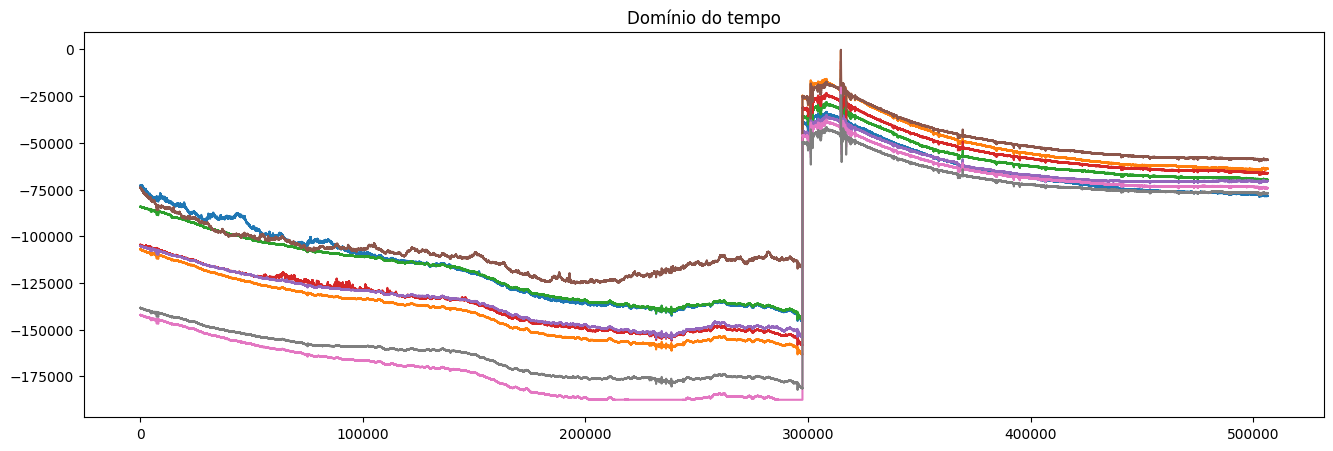

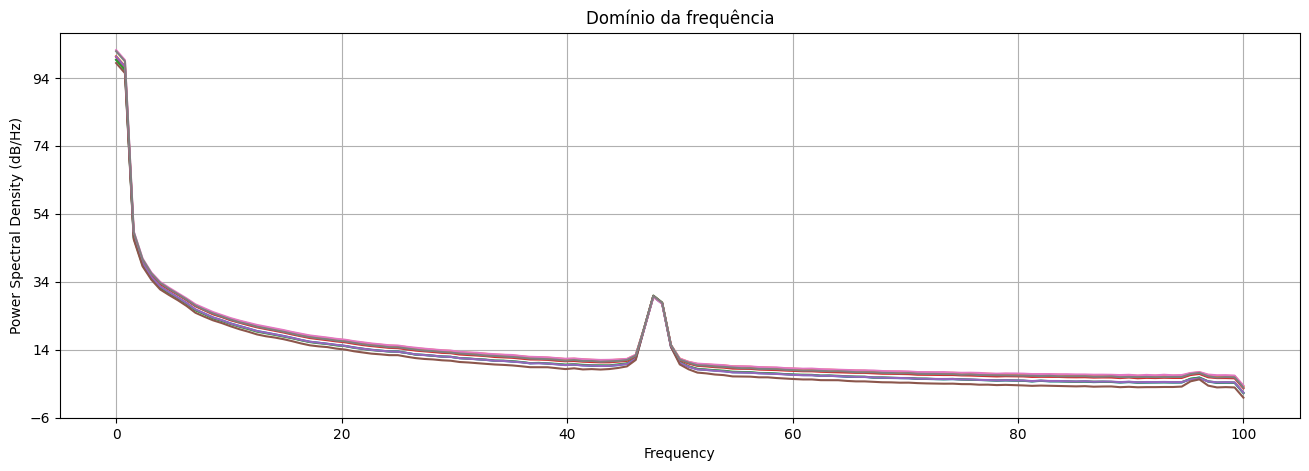

In [3]:
#apresentação dos dados sem aplicação dos filtros

data = np.load('../dataset/s5/data.npy')  #carrega os dados do arquivo data.npy
rcParams['figure.figsize'] = [16.,5.]

print_graphs(data)

# Aplicação do filtro notch
Removendo principalmente dados de interferencia da rede eletrica

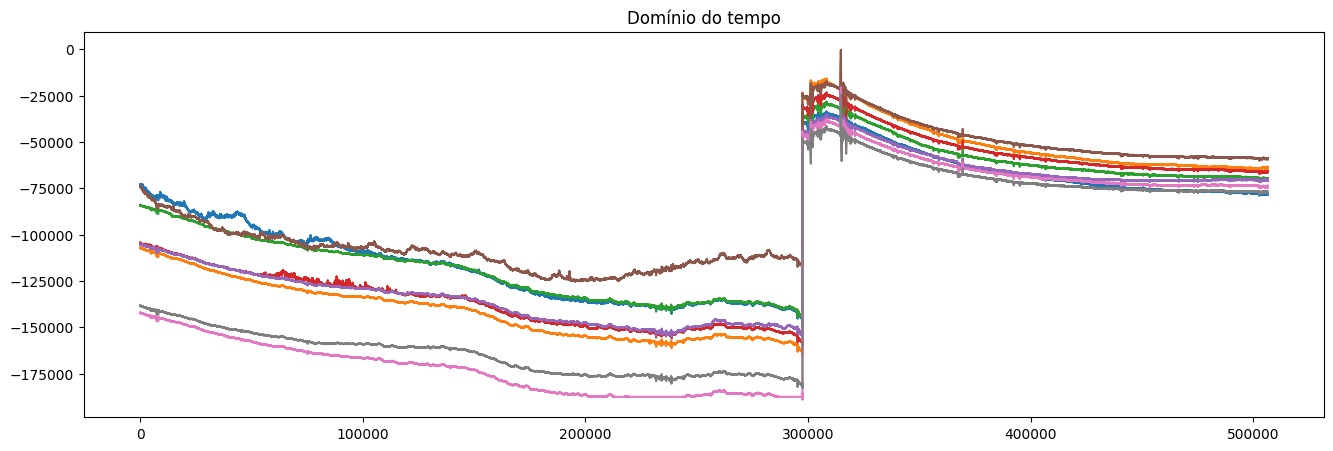

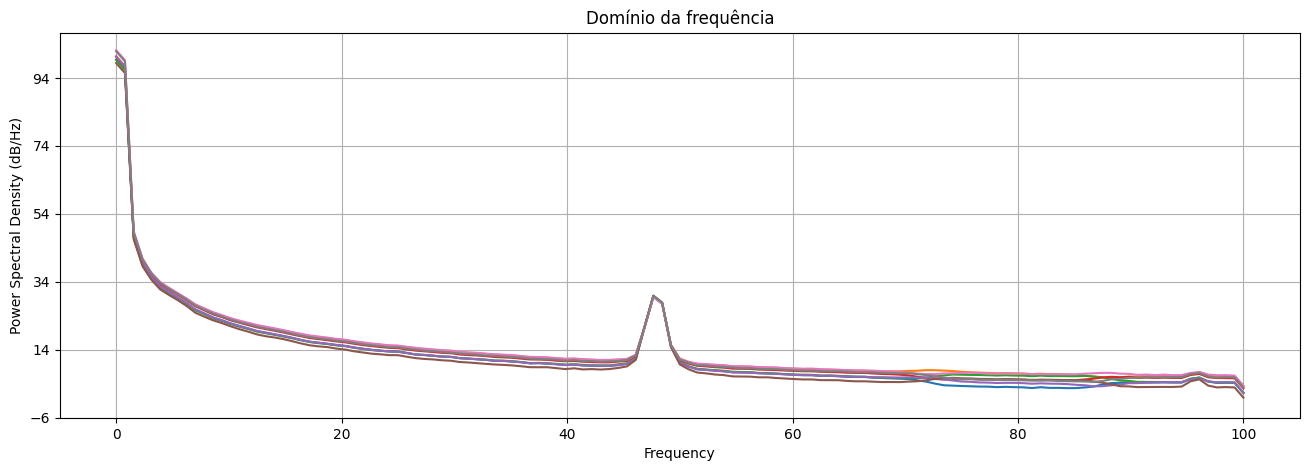

In [4]:
data_filtered = dc(data)
data_filtered = butter_notch(data.flatten(), 60)
data_filtered = data_filtered.reshape(int(data_filtered.shape[0] / 8), 8)
print_graphs(data_filtered)

In [5]:
# teste com o objeto MNE

n_channels = 8
ch_types = ['eeg'] * n_channels
sfreq = 250
ch_names = ["Fp1", "Fp2", "F3", "F4", "T7", "T8", "P3", "P4"]
info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)
info.set_montage("standard_1020")
mne_data = mne.io.RawArray(data.T, info)
mne_data

Creating RawArray with float64 data, n_channels=8, n_times=506505
    Range : 0 ... 506504 =      0.000 ...  2026.016 secs
Ready.


Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,11 points
Good channels,8 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,250.00 Hz
Highpass,0.00 Hz
Lowpass,125.00 Hz


Effective window size : 8.192 (s)


/home/thaynoanhit/Documentos/Reconhecimento_De_Padroes/venv/lib/python3.10/site-packages/mne/viz/utils.py:165: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


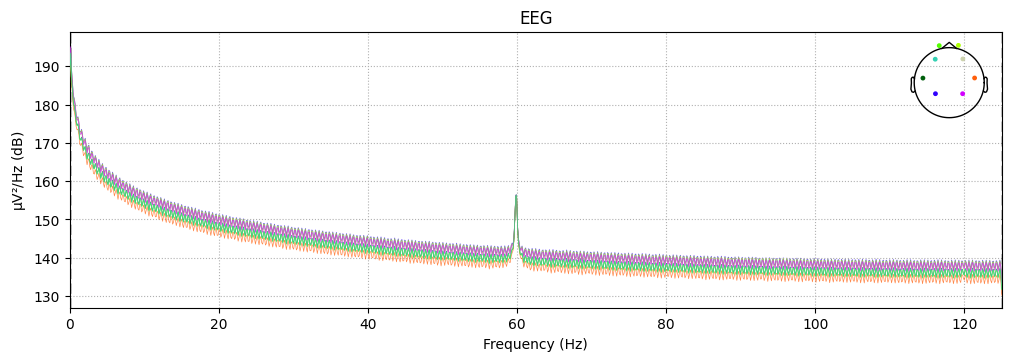

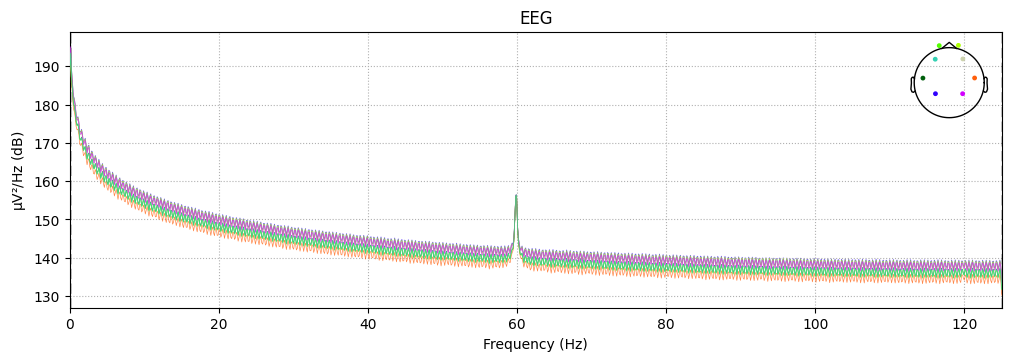

In [6]:
# Assuming mne_data is your MNE RawArray object
psd = mne_data.compute_psd()

# Plot the PSD with a sprecific color
psd.plot()

Effective window size : 8.192 (s)


/home/thaynoanhit/Documentos/Reconhecimento_De_Padroes/venv/lib/python3.10/site-packages/mne/viz/utils.py:165: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


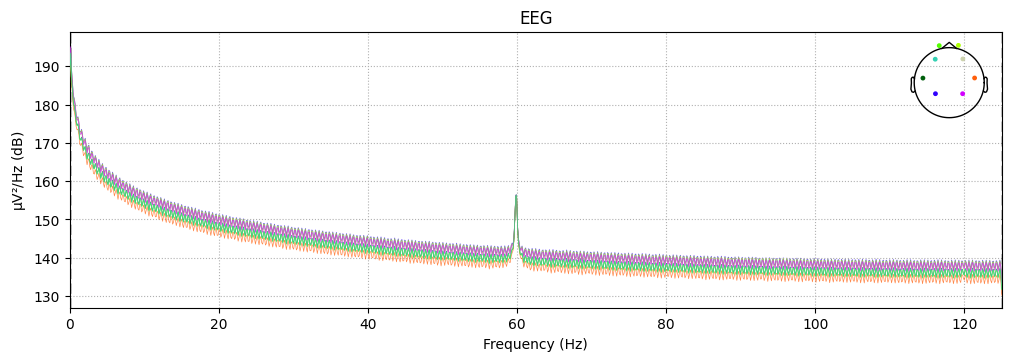

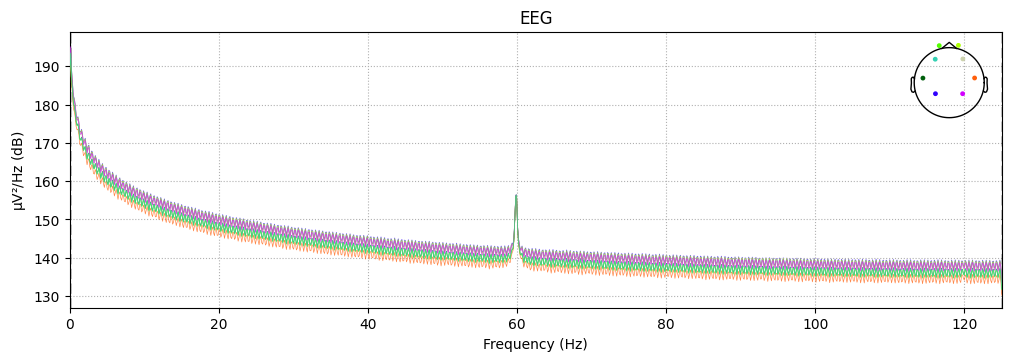

In [7]:
mne_data.compute_psd().plot()

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 60.90 Hz)
- Filter length: 1651 samples (6.604 s)



Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 413 samples (1.652 s)

Effective window size : 8.192 (s)


/home/thaynoanhit/Documentos/Reconhecimento_De_Padroes/venv/lib/python3.10/site-packages/mne/viz/utils.py:165: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


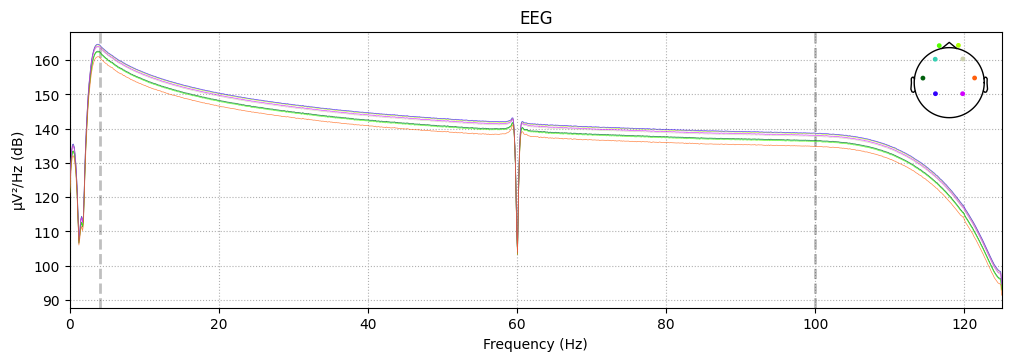

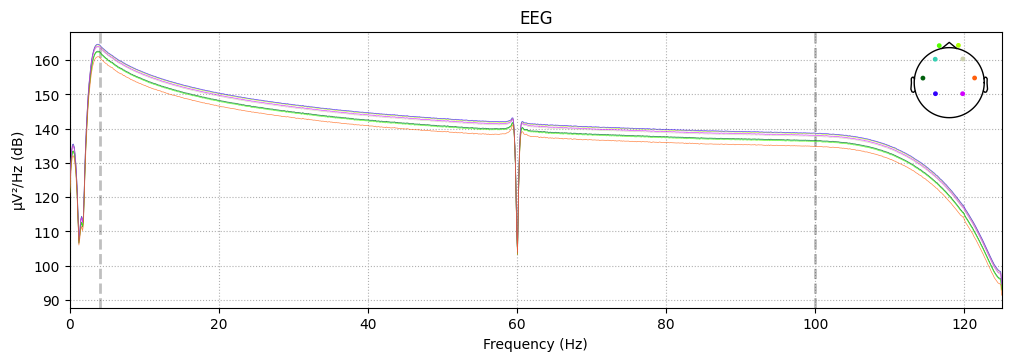

In [8]:
mne_data_filtered = mne_data.copy()
mne_data_filtered = mne_data_filtered.notch_filter(freqs=60)
mne_data_filtered = mne_data_filtered.filter(l_freq=4, h_freq=100)
mne_data_filtered.compute_psd().plot()

In [9]:
mne_data_filtered.save('../data_filtered.fif', overwrite=True)

Overwriting existing file.
Writing /home/thaynoanhit/Documentos/Reconhecimento_De_Padroes/src/../data_filtered.fif


/tmp/ipykernel_5964/2816160230.py:1: RuntimeWarning: This filename (/home/thaynoanhit/Documentos/Reconhecimento_De_Padroes/src/../data_filtered.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  mne_data_filtered.save('../data_filtered.fif', overwrite=True)


Closing /home/thaynoanhit/Documentos/Reconhecimento_De_Padroes/src/../data_filtered.fif
[done]
